# 합성곱 신경망(Convolutional Neural Networks, CNNs)

- 이미지 인식, 음성 인식 등에 자주 사용되는데,  
  특히, 이미지 인식 분야에서 거의 모든 딥러닝 기술에 사용

<br>

## 컨볼루션 신경망의 등장
- 1989년 얀 르쿤(Yann LeCun) 교수의 논문에서 발표

  - 필기체 인식에서 의미가 있었지만 범용화하는데에는 무리

- 1998년, "Gradient-Based Learning Applied to Document Recognition"이라는 논문에서 LeNet-5 제시

- 합성곱 층(convolution layer), 풀링 층(pooling layer) 소개
  <br>

  <img src="https://miro.medium.com/max/4308/1*1TI1aGBZ4dybR6__DI9dzA.png">
  
  <center>[LeNet-5 구조]</center>

  <sub>출처: https://medium.com/@pechyonkin/key-deep-learning-architectures-lenet-5-6fc3c59e6f4</sub>


## 완전연결계층과의 차이
- 완전연결계층(Fully-Connected Layer)은 이미지와 같은 데이터의 형상(3차원)을 무시함  

- 모든 입력데이터를 동등하게 취급  
  즉, **데이터의 특징을 잃어버리게 됨**

- 컨볼루션층(convolution layer)은 <u>**이미지 픽셀 사이의 관계를 고려**</u>

- 완전연결계층은 공간정보를 손실하지만, 컨볼루션층은 공간정보를 유지  
  - 이미지와 같은 2차원(흑백) 또는 3차원(컬러)의 형상을 유지

  - 공간정보를 유지하기 때문에 완전연결계층에 비해 적은 수의 파라미터를 요구


## 컨볼루션 신경망 구조 예시

<img src="https://www.oreilly.com/library/view/neural-network-projects/9781789138900/assets/c38754ca-f2ea-425a-b7a6-1fe0f2f5074e.png" width="600">

<sub>출처: https://www.oreilly.com/library/view/neural-network-projects/9781789138900/8e87ad66-6de3-4275-81a4-62b54436bf16.xhtml</sub>



## 합성곱 연산
- 필터(filter) 연산
  - 입력 데이터에 필터를 통한 어떠한 연산을 진행
  
  - **필터에 대응하는 원소끼리 곱하고, 그 합을 구함**

  - 연산이 완료된 결과 데이터를 **특징 맵(feature map)**이라 부름

- 필터(filter)
  - 커널(kernel)이라고도 칭함
  
  - 흔히 사진 어플에서 사용하는 '이미지 필터'와 비슷한 개념

  - 필터의 사이즈는 "거의 항상 홀수"
    - 짝수이면 패딩이 비대칭이 되어버림
  
    - 왼쪽, 오른쪽을 다르게 주어야함
  
    - 중심위치가 존재, 즉 구별된 하나의 픽셀(중심 픽셀)이 존재

  - 필터의 학습 파라미터 개수는 입력 데이터의 크기와 상관없이 일정  
    따라서, 과적합을 방지할 수 있음

  <br>
  <img src="https://miro.medium.com/max/1070/1*Zx-ZMLKab7VOCQTxdZ1OAw.gif">

  <sub>출처: http://deeplearning.net/software/theano_versions/dev/tutorial/conv_arithmetic.html</sub>


- 연산 시각화
  <img src="https://www.researchgate.net/profile/Ihab_S_Mohamed/publication/324165524/figure/fig3/AS:611103423860736@1522709818959/An-example-of-convolution-operation-in-2D-2.png" width="500">

  <sub>출처: https://www.researchgate.net/figure/An-example-of-convolution-operation-in-2D-2_fig3_324165524</sub>


- 일반적으로, 합성곱 연산을 한 후의 데이터 사이즈는  
  ### $\quad (n-f+1) \times (n-f+1)$
    $n$: 입력 데이터의 크기  
    $f$: 필터(커널)의 크기


  <img src="https://miro.medium.com/max/1400/1*Fw-ehcNBR9byHtho-Rxbtw.gif" width="400">

  <sub>출처: https://towardsdatascience.com/intuitively-understanding-convolutions-for-deep-learning-1f6f42faee1</sub>
  
  위 예에서 입력 데이터 크기($n$)는 5, 필터의 크기($k$)는 3이므로  
  출력 데이터의 크기는 $(5 - 3 + 1) = 3$


## 패딩(padding)과 스트라이드(stride)
- 필터(커널) 사이즈과 함께 **입력 이미지와 출력 이미지의 사이즈를 결정**하기 위해 사용

- 사용자가 결정할 수 있음



### 패딩
- 입력 데이터의 주변을 특정 값으로 채우는 기법
  - 주로 0으로 많이 채움

  <img src="https://upload.wikimedia.org/wikipedia/commons/0/06/Convolution_arithmetic_-_Full_padding_no_strides.gif?20190413174624" width="300">

- 출력 데이터의 크기
  ### $\quad (n+2p-f+1) \times (n+2p-f+1)$

  위 그림에서, 입력 데이터의 크기($n$)는 5, 필터의 크기($f$)는 4, 패딩값($p$)은 2이므로    
  출력 데이터의 크기는 ($5 + 2\times 2 - 4 + 1) = 6$

### 'valid' 와 'same'
- 'valid'
  - 패딩을 주지 않음
  - padding=0 (0으로 채워진 테두리가 아니라 패딩을 주지 않는다는 의미)

- 'same'
  - 패딩을 주어 입력 이미지의 크기와 연산 후의 이미지 크기를 같게함

  - 만약, 필터(커널)의 크기가 $k$ 이면,  
    패딩의 크기는 $p = \frac{k-1}{2}$ (단, <u>stride=1)</u>



### 스트라이드
- 필터를 적용하는 간격을 의미

- 아래는 그림의 간격 2

  <img src="https://miro.medium.com/max/588/1*BMngs93_rm2_BpJFH2mS0Q.gif">


## 출력 데이터의 크기

## $\qquad OH = \frac{H + 2P - FH}{S} + 1 $ 
## $\qquad OW = \frac{W + 2P - FW}{S} + 1 $ 

- 입력 크기 : $(H, W)$

- 필터 크기 : $(FH, FW)$

- 출력 크기 : $(OH, OW)$

- 패딩, 스트라이드 : $P, S$

- (주의) 
  - 위 식의 값에서 $\frac{H + 2P - FH}{S}$ 또는 $\frac{W + 2P - FW}{S}$가 정수로 나누어 떨어지는 값이어야 함
  - 만약, 정수로 나누어 떨어지지 않으면  
    패딩, 스트라이드값을 조정하여 정수로 나누어 떨어지게 해야함


## 풀링(Pooling)

- 필터(커널) 사이즈 내에서 특정 값을 추출하는 과정

### 맥스 풀링(Max Pooling)
- 가장 많이 사용되는 방법

- 출력 데이터의 사이즈 계산은 컨볼루션 연산과 동일
## $\quad OH = \frac{H + 2P - FH}{S} + 1 $ 
## $\quad OW = \frac{W + 2P - FW}{S} + 1 $ 

- 일반적으로 stride=2, kernel_size=2 를 통해  
  **특징맵의 크기를 <u>절반으로 줄이는 역할</u>**

- 모델이 물체의 주요한 특징을 학습할 수 있도록 해주며,  
  컨볼루션 신경망이 이동 불변성 특성을 가지게 해줌
  - 예를 들어, 아래의 그림에서 초록색 사각형 안에 있는  
    2와 8의 위치를 바꾼다해도 맥스 풀링 연산은 8을 추출

- 모델의 파라미터 개수를 줄여주고, 연산 속도를 빠르게 해줌

  <br>

  <img src="https://cs231n.github.io/assets/cnn/maxpool.jpeg" width="600">

  <sub>출처: https://cs231n.github.io/convolutional-networks/</sub>

### 평균 풀링(Avg Pooling)

- 필터 내의 있는 픽셀값의 평균을 구하는 과정

- 과거에 많이 사용, 요즘은 잘 사용되지 않는다.

- 맥스풀링과 마찬가지로 stride=2, kernel_size=2 를 통해  
  특징 맵의 사이즈를 줄이는 역할

  <img src="https://www.researchgate.net/profile/Juan_Pedro_Dominguez-Morales/publication/329885401/figure/fig21/AS:707709083062277@1545742402308/Average-pooling-example.png" width="600">

  <sub>출처: https://www.researchgate.net/figure/Average-pooling-example_fig21_329885401</sub>

## 합성곱 연산의 의미

## 2차원 이미지에 대한 필터 연산 예시
  - 가장 자리 검출(Edge-Detection)

  - 소벨 필터(Sobel Filter)

    - Horizontal : 가로 방향의 미분을 구하는 필터 역할

    - Vertical : 세로 방향의 미분을 구하는 필터 역할  

  <img src="https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcT_ZRkuiCkv0ZEHFiyCp-7Y5bCL0liaYSQ4mg&usqp=CAU" width="350">

  <sub>출처: https://www.cloras.com/blog/image-recognition/</sub>


### modules import

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import urllib
import requests
from io import BytesIO


### util functions

In [4]:
def url_to_image(url, gray=False):
    resp = urllib.request.urlopen(url)
    image = np.asarray(bytearray(resp.read()))
    
    if gray:
        image = cv2.imdecode(image, cv2.IMREAD_GRAYSCALE)
    else:
        image = cv2.imdecode(image, cv2.IMREAD_COLOR)
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    
    return image

def filtered_image(image, filter, output_size):
    filtered_img = np.zeros((output_size, output_size))
    filter_size = filter.shape[0]
    
    for i in range(output_size):
        for j in range(output_size):
            multiply_values = image[i:(i + filter_size), j:(j + filter_size)] * filter
            sum_value = np.sum(multiply_values)
            
            if sum_value > 255:
                sum_value = 255
            
            filtered_img[i, j] = sum_value
    
    return filtered_img

### 이미지 확인
- 예시이므로 정사각형 사이즈로 진행

image shape: (512, 512)


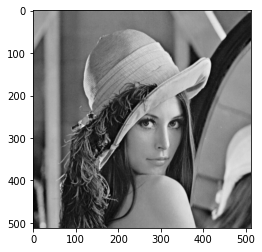

In [5]:
img_url = 'https://upload.wikimedia.org/wikipedia/ko/2/24/Lenna.png?20170110121321'

image = url_to_image(img_url, gray=True)
print('image shape:', image.shape)

plt.imshow(image, cmap='gray')
plt.show()

### 필터연산 적용

output_size: 510


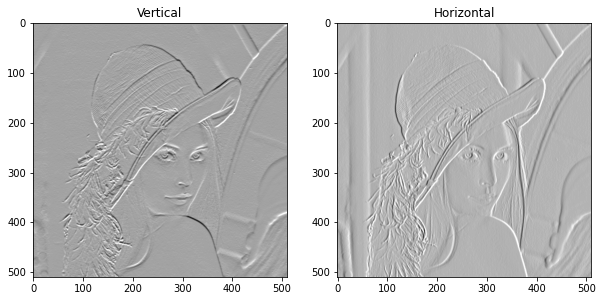

In [7]:
vertical_filter = np.array([[1., 2., 1.],
                            [0., 0., 0.],
                            [-1., -2., -1.]])
horizontal_filter = np.array([[1., 0., -1.],
                              [2., 0., -2.],
                              [1., 0., -1.]])

output_size = int((image.shape[0] - 3) / 1 + 1)
print('output_size:', output_size)

vertical_filtered = filtered_image(image, vertical_filter, output_size)
horizontal_filtered = filtered_image(image, horizontal_filter, output_size)

plt.figure(figsize=(10, 10))
plt.subplot(1, 2, 1)
plt.title('Vertical')
plt.imshow(vertical_filtered, cmap='gray')

plt.subplot(1, 2, 2)
plt.title('Horizontal')
plt.imshow(horizontal_filtered, cmap='gray')
plt.show()

### 이미지 필터를 적용한 최종 결과

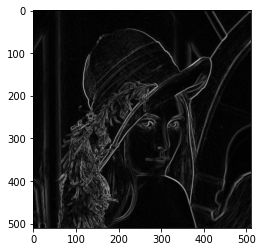

In [9]:
sobel_img = np.sqrt(np.square(horizontal_filtered)
                    + np.square(vertical_filtered))

plt.imshow(sobel_img, cmap='gray')

## 3차원 데이터의 합성곱 연산
- **이미지는 3차원으로 구성**
  - (가로, 세로, 채널 수)
  - 채널 : RGB 

- 색상값의 정도에 따라 color색 결정

  <img src="https://www.projectorcentral.com/images/articles/RGB-Explained-600.jpg">

  <sub>출처: https://www.projectorcentral.com/All-About-Bit-Depth.htm?page=What-Bit-Depth-Looks-Like</sub>

### 아래의 이미지 확인은 참고사항

image shape: (512, 512, 3)


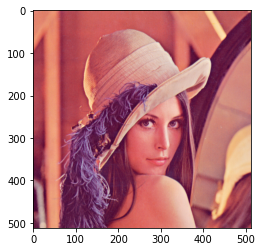

In [10]:
img_url = 'https://upload.wikimedia.org/wikipedia/ko/2/24/Lenna.png?20170110121321'

image = url_to_image(img_url)
print('image shape:', image.shape)

plt.imshow(image)
plt.show()

In [11]:
image_copy = image.copy()
image_copy[:, :, 1] = 0 # G
image_copy[:, :, 2] = 0 # B
image_red = image_copy

In [12]:
image_red

array([[[226,   0,   0],
        [226,   0,   0],
        [223,   0,   0],
        ...,
        [230,   0,   0],
        [221,   0,   0],
        [200,   0,   0]],

       [[226,   0,   0],
        [226,   0,   0],
        [223,   0,   0],
        ...,
        [230,   0,   0],
        [221,   0,   0],
        [200,   0,   0]],

       [[226,   0,   0],
        [226,   0,   0],
        [223,   0,   0],
        ...,
        [230,   0,   0],
        [221,   0,   0],
        [200,   0,   0]],

       ...,

       [[ 84,   0,   0],
        [ 84,   0,   0],
        [ 92,   0,   0],
        ...,
        [173,   0,   0],
        [172,   0,   0],
        [177,   0,   0]],

       [[ 82,   0,   0],
        [ 82,   0,   0],
        [ 96,   0,   0],
        ...,
        [179,   0,   0],
        [181,   0,   0],
        [185,   0,   0]],

       [[ 82,   0,   0],
        [ 82,   0,   0],
        [ 96,   0,   0],
        ...,
        [179,   0,   0],
        [181,   0,   0],
        [185,   0,   0]]

In [13]:
image_copy = image.copy()
image_copy[:, :, 0] = 0 # R
image_copy[:, :, 2] = 0 # B
image_green = image_copy

In [14]:
image_copy = image.copy()
image_copy[:, :, 0] = 0
image_copy[:, :, 1] = 0
image_blue = image_copy

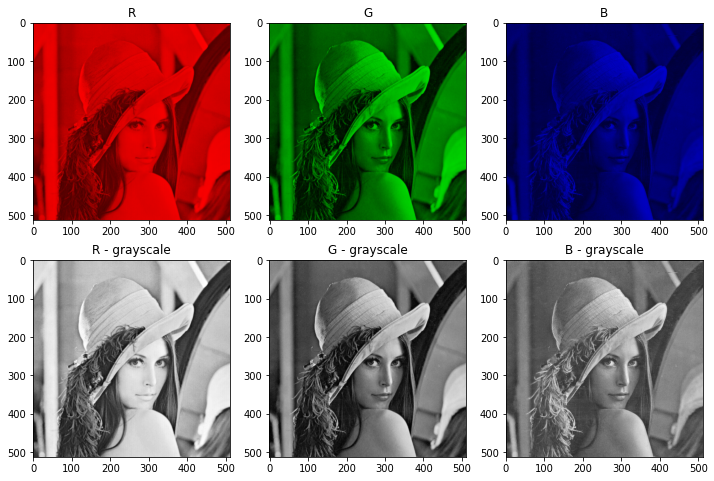

In [15]:
fig = plt.figure(figsize=(12, 8))

title_list = ['R', 'G', 'B',
              'R - grayscale', 'G - grayscale', 'B - grayscale']
image_list = [image_red, image_green, image_blue,
              image_red[:, :, 0], image_green[:, :, 1], image_blue[:, :, 2]]

for i, image in enumerate(image_list):
    ax = fig.add_subplot(2, 3, i + 1)
    ax.title.set_text(f'{title_list[i]}')
    
    if i >= 3:
        plt.imshow(image, cmap='gray')
    else:
        plt.imshow(image)
plt.show()

### 연산 과정

- 각 채널마다 컨볼루션 연산을 적용
  - 3채널을 모두 합쳐서 '하나의 필터'라고 칭함  
    
  <img src="https://miro.medium.com/max/2000/1*8dx6nxpUh2JqvYWPadTwMQ.gif" width="600">

<br>

- 각각의 결과를 더함  
  
  <img src="https://miro.medium.com/max/2000/1*CYB2dyR3EhFs1xNLK8ewiA.gif" width="600">

<br>

- 더한 결과에 편향을 더함  
  <img src="https://miro.medium.com/max/588/1*RYYucIh3U-YFxrIkyQKzRw.gif" width="300">

  <sub>출처: https://towardsdatascience.com/intuitively-understanding-convolutions-for-deep-learning-1f6f42faee1</sub>



### modules import

In [16]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import urllib
import requests
from io import BytesIO

### util functions

In [44]:
def url_to_image(url, gray=False):
    resp = urllib.request.urlopen(url)
    image = np.asarray(bytearray(resp.read()))
    
    if gray:
        image = cv2.imdecode(image, cv2.IMREAD_GRAYSCALE)
    else:
        image = cv2.imdecode(image, cv2.IMREAD_COLOR)
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    
    return image

def conv_op(image, kernel, pad=0, stride=1):
    H, W, C = image.shape
    kernel_size = kernel.shape[0]
    
    out_h = (H + 2 * pad - kernel_size) // stride + 1
    out_w = (W + 2 * pad - kernel_size) // stride + 1
    
    filtered_img = np.zeros((out_h, out_w))
    img = np.pad(image, [(pad, pad), (pad, pad), (0, 0)], 'constant') # 상하좌우 패딩
    
    for i in range(out_h):
        for j in range(out_w):
            for c in range(C):
                multiply_values = image[i:(i + kernel_size), 
                                        j:(j + kernel_size),
                                        c] * kernel
                sum_value = np.sum(multiply_values)
                
                filtered_img[i, j] += sum_value
    
    # 원하는 출력물 형태로 변환 후, 축을 원하는 형태로 바꿈
    filtered_img = filtered_img.reshape(1, out_h, out_w, -1).transpose(0, 3, 1, 2)
    
    return filtered_img # .astype('uint8')

### 이미지 확인

image shape: (512, 512, 3)


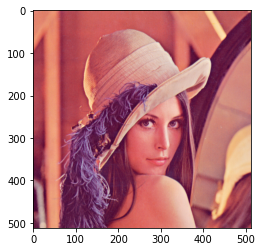

In [45]:
img_url = 'https://upload.wikimedia.org/wikipedia/ko/2/24/Lenna.png?20170110121321'

image = url_to_image(img_url)
print('image shape:', image.shape)

plt.imshow(image)
plt.show()

### 필터연산 적용
- 3x3 크기의 3채널 필터 5개

- (5, 3, 3, 3) ----> (5개, 3채널, 세로, 가로)

In [46]:
filter1 = np.random.randn(3, 3, 3)
filter1.shape, filter1

((3, 3, 3),
 array([[[-1.37056636, -0.89800706, -1.43119637],
         [-0.28875347,  0.12523268,  1.41093003],
         [-0.41004452,  0.41372956,  3.19411324]],
 
        [[ 0.18823087, -1.23569984,  1.55572335],
         [ 0.4746338 , -1.47160971,  0.1619333 ],
         [ 0.16098698,  1.16289164, -0.47063235]],
 
        [[-0.23566785,  1.3821783 , -1.45642792],
         [-0.1660803 , -0.50608595, -1.18417532],
         [-0.05668263,  0.83594417,  0.8083871 ]]]))

(1, 1, 510, 510)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


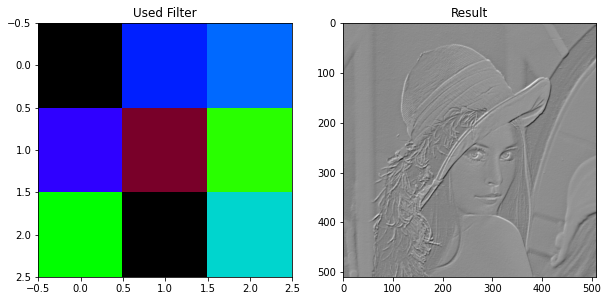

In [47]:
filtered_img1 = conv_op(image, filter1)
print(filtered_img1.shape)

plt.figure(figsize=(10, 10))
plt.subplot(1, 2, 1)
plt.title('Used Filter')
plt.imshow(filter1, cmap='gray')

plt.subplot(1, 2, 2)
plt.title('Result')
plt.imshow(filtered_img1[0, 0, :, :], cmap='gray')
plt.show()

In [48]:
filter2 = np.random.randn(3, 3, 3)
filter2.shape, filter2

((3, 3, 3),
 array([[[ 0.53571599,  2.10785754,  0.25003712],
         [ 0.82243569,  1.41599096, -0.66061446],
         [-0.2317211 , -1.87325707, -0.77257646]],
 
        [[ 0.38775189, -0.88111414,  1.60302637],
         [-1.28367636,  0.0701243 , -0.09991646],
         [ 1.63372041,  1.33289615,  0.7375686 ]],
 
        [[ 0.81153803,  2.99192174,  0.70744177],
         [-0.07063502,  0.94769657,  3.22333082],
         [-0.39275777,  0.68080233, -1.72825222]]]))

(1, 1, 510, 510)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


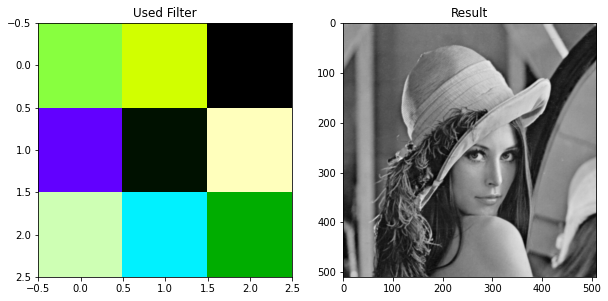

In [49]:
filtered_img2 = conv_op(image, filter2)
print(filtered_img2.shape)

plt.figure(figsize=(10, 10))
plt.subplot(1, 2, 1)
plt.title('Used Filter')
plt.imshow(filter2, cmap='gray')

plt.subplot(1, 2, 2)
plt.title('Result')
plt.imshow(filtered_img2[0, 0, :, :], cmap='gray')
plt.show()

In [50]:
filter3 = np.random.randn(3, 3, 3)
filter3.shape, filter3

((3, 3, 3),
 array([[[-1.29157553,  0.61408956, -0.92923877],
         [ 0.86370268, -2.55888596,  1.4385418 ],
         [ 0.20815528,  0.91682948, -1.53013127]],
 
        [[-0.99804641, -1.09099079,  0.41880589],
         [-0.11919996, -1.51058135,  0.46164574],
         [ 0.17648822, -0.39377905, -0.33427062]],
 
        [[ 1.04430974,  1.23186332, -1.96309549],
         [ 0.3232157 ,  0.16004472,  0.89444916],
         [ 0.51779658,  0.2323874 , -1.50840272]]]))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(1, 1, 510, 510)


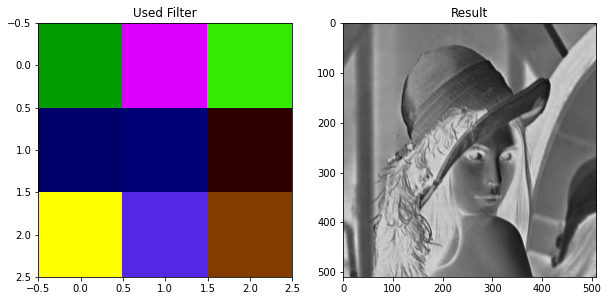

In [51]:
filtered_img3 = conv_op(image, filter3)
print(filtered_img3.shape)

plt.figure(figsize=(10, 10))
plt.subplot(1, 2, 1)
plt.title('Used Filter')
plt.imshow(filter3, cmap='gray')

plt.subplot(1, 2, 2)
plt.title('Result')
plt.imshow(filtered_img3[0, 0, :, :], cmap='gray')
plt.show()

In [52]:
filter4 = np.random.randn(3, 3, 3)
filter4.shape, filter4

((3, 3, 3),
 array([[[ 0.09280072, -1.74677924,  1.96828   ],
         [-1.05084895, -0.62266615,  0.83129731],
         [-0.38504573, -0.69445674, -0.40643715]],
 
        [[-0.15371274,  1.45313401, -1.19247329],
         [-2.05908314,  1.04736662,  0.64738711],
         [-0.40434019,  0.28610334, -1.64804089]],
 
        [[-1.17916991,  0.91432189,  0.33205571],
         [ 0.87393117,  0.45047255,  1.34111044],
         [ 0.50993752,  0.4002893 ,  0.63649718]]]))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(1, 1, 510, 510)


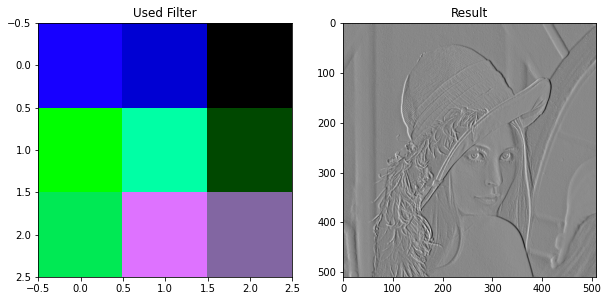

In [53]:
filtered_img4 = conv_op(image, filter4)
print(filtered_img4.shape)

plt.figure(figsize=(10, 10))
plt.subplot(1, 2, 1)
plt.title('Used Filter')
plt.imshow(filter4, cmap='gray')

plt.subplot(1, 2, 2)
plt.title('Result')
plt.imshow(filtered_img4[0, 0, :, :], cmap='gray')
plt.show()

In [54]:
filter5 = np.random.randn(3, 3, 3)
filter5.shape, filter5

((3, 3, 3),
 array([[[-0.99075937, -0.19081321,  0.54279892],
         [ 1.47273007, -1.54921085, -0.54257575],
         [-1.4092239 , -0.10518164,  0.46779635]],
 
        [[ 0.87169859,  1.10388289, -0.61857957],
         [-0.35283036,  0.63775266, -0.33436178],
         [-0.16317198, -0.94337807, -0.05945421]],
 
        [[-0.88712131,  0.10147745, -0.02663338],
         [ 2.05406996, -0.0624104 , -0.29182431],
         [-0.66588932, -0.22492822,  0.1556829 ]]]))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(1, 1, 510, 510)


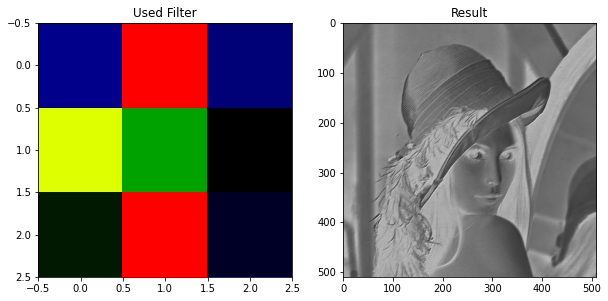

In [55]:
filtered_img5 = conv_op(image, filter5)
print(filtered_img5.shape)

plt.figure(figsize=(10, 10))
plt.subplot(1, 2, 1)
plt.title('Used Filter')
plt.imshow(filter5, cmap='gray')

plt.subplot(1, 2, 2)
plt.title('Result')
plt.imshow(filtered_img5[0, 0, :, :], cmap='gray')
plt.show()

### 필터연산을 적용한 최종 결과

(1, 1, 510, 510)


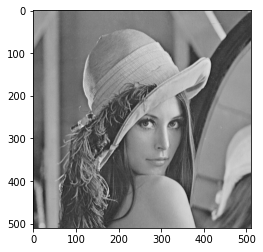

In [57]:
filtered_img = np.stack([filtered_img1, filtered_img2, filtered_img3, 
                         filtered_img4, filtered_img5]).sum(axis=0)
print(filtered_img.shape)

plt.imshow(filtered_img[0, 0, :, :], cmap='gray')
plt.show()

### 전체 과정 한번에 보기

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


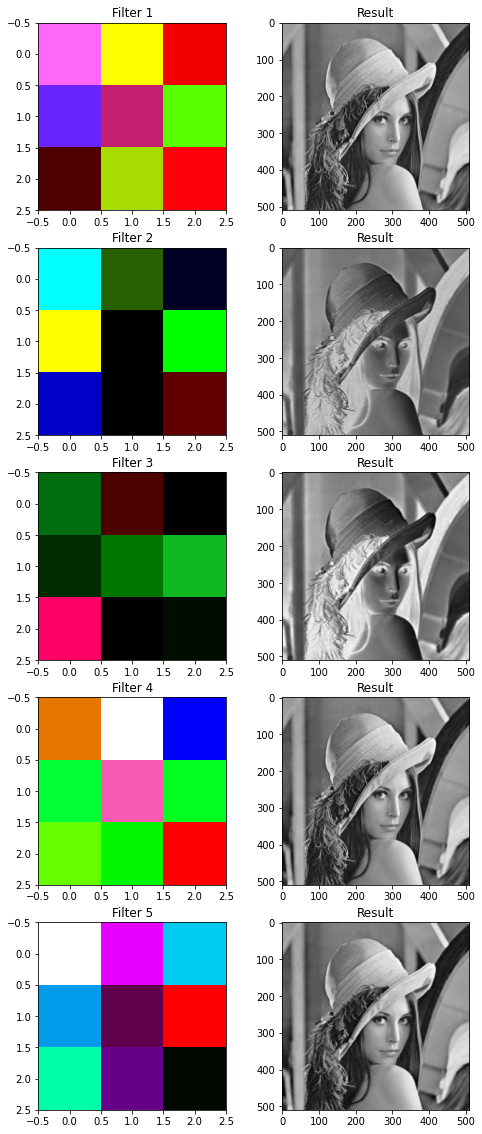

In [60]:
np.random.seed(0)

fig = plt.figure(figsize=(8, 20))

filter_num = 5
filtered_img = []

for i in range(filter_num):
    ax = fig.add_subplot(5, 2, 2 * i + 1)
    ax.title.set_text(f'Filter {i + 1}')
    
    filter = np.random.randn(3, 3, 3)
    plt.imshow(filter);
    
    ax = fig.add_subplot(5, 2, 2 * i + 2)
    ax.title.set_text(f'Result')
    
    filtered = conv_op(image, filter)
    filtered_img.append(filtered)
    plt.imshow(filtered[0, 0, :, :], cmap='gray')
plt.show()

(1, 1, 510, 510)


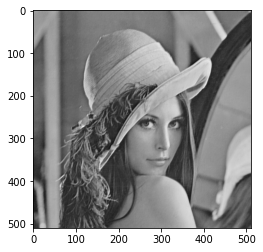

In [61]:
filtered_img = np.stack(filtered_img).sum(axis=0)
print(filtered_img.shape)

plt.imshow(filtered_img[0, 0, :, :], cmap='gray')
plt.show()

# 합성곱 신경망 구현
- 참고: 밑바닥부터 시작하는 딥러닝1

## 합성곱 층(Convolution Layer)

In [62]:
def im2col(input_data, filter_h, filter_w, stride=1, pad=0):
    
    N, C, H, W = input_data.shape
    out_h = (H + 2 * pad - filter_h) // stride + 1
    out_w = (W + 2 * pad - filter_w) // stride + 1
    
    img = np.pad(input_data, [(0, 0), (0, 0), (pad, pad), (pad, pad)], 'constant')
    col = np.zeros((N, C, filter_h, filter_w, out_h, out_w))
    
    for y in range(filter_h):
        y_max = y + stride * out_h
        for x in range(filter_w):
            x_max = x + stride * out_w
            col[:, :, y, x, :, :] = img[:, :, y:y_max:stride, x:x_max:stride]
    
    col = col.transpose(0, 4, 5, 1, 2, 3).reshape(N * out_h * out_w, -1)
    return col

def col2im(col, input_shape, filter_h, filter_w, stride=1, pad=0):
    
    N, C, H, W = input_shape
    out_h = (H + 2 * pad - filter_h) // stride + 1
    out_w = (W + 2 * pad - filter_w) // stride + 1
    
    col = col.reshape(N, out_h, out_w, filter_h, filter_w).transpose(0, 3, 4, 5, 1, 2)
    
    img = np.zeros((N, C, H + 2 * pad + stride - 1, W + 2 * pad + stride - 1))
    for y in range(filter_h):
        y_max = y + stride * out_h
        for x in range(filter_w):
            x_max = x + stride * out_w
            img[:, :, y:y_max:stride, x:x_max:stride] = col[:, :, y, x, :, :]
    return img[:, :, pad:H + pad, pad:W + pad]

In [63]:
class Conv2D:
    def __init__(self, W, b, stride=1, pad=0):
        self.W = W
        self.b = b
        self.stride = stride
        self.pad = pad
        
        self.input_data = None
        self.col = None
        self.col_W = None
        
        self.dW = None
        self.db = None
    
    def forward(self, input_data):
        FN, C, FH, FW = self.W.shape
        N, C, H, W = input_data.shape
        out_h = (H + 2 * self.pad - FH) // self.stride + 1
        out_w = (W + 2 * self.pad - FW) // self.stride + 1
        
        col = im2col(input_data, FH, FW, self.stride, self.pad)
        col_W = self.W.reshape(FN, -1).T
        
        out = np.dot(col, col_W) + self.b
        output = out.reshape(N, out_h, out_w, -1).transpose(0, 3, 1, 2)
        
        self.input_data = input_data
        self.col = col
        self.col_W = col_W
        
        return output
    
    def backward(self, dout):
        FN, C, FH, FW = self.W.shape
        dout = dout.transpose(0, 2, 3, 1).reshape(-1, FN)
        
        self.db = np.sum(dout, axis=0)
        self.dW = np.dot(self.col.T, dout)
        self.dW = self.dW.transpose(1, 0).reshape(FN, C, FH, FW)
        
        dcol = np.dot(dout, self.col_W.T)
        dx = col2im(dcol, self.input_data.shape, FH, FW, self.stride, self.pad)
        
        return dx

### 컨볼루션 레이어 테스트

In [65]:
def init_weight(num_filters, data_dim, kernel_size, stride=1, pad=0, weight_std=0.01):
    weights = weight_std + np.random.randn(num_filters, data_dim, kernel_size, kernel_size)
    biases = np.zeros(num_filters)
    
    return weights, biases

image shape: (512, 512, 1)


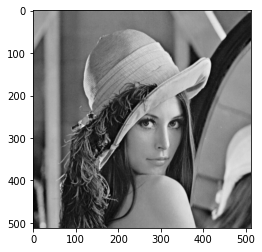

In [66]:
img_url = 'https://upload.wikimedia.org/wikipedia/ko/2/24/Lenna.png?20170110121321'
image_gray = url_to_image(img_url, gray=True)
image_gray = image_gray.reshape(image_gray.shape[0], -1, 1)
print('image shape:', image_gray.shape)

image_gray = np.expand_dims(image_gray.transpose(2, 0, 1), axis=0)

plt.imshow(image_gray[0, 0, :, :], cmap='gray')
plt.show()

In [67]:
W, b = init_weight(1, 1, 3)
conv = Conv2D(W, b)
output  = conv.forward(image_gray)

print('Conv Layer size:', output.shape)

Conv Layer size: (1, 1, 510, 510)


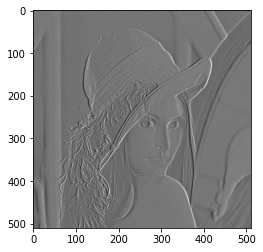

In [68]:
plt.imshow(output[0, 0, : :], cmap='gray')

In [70]:
W2, b2 = init_weight(1, 1, 3, stride=2)
conv2 = Conv2D(W2, b2, stride=2)
output2  = conv2.forward(image_gray)

print('Conv Layer size:', output2.shape)

Conv Layer size: (1, 1, 255, 255)


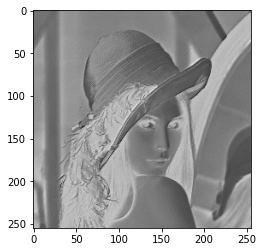

In [71]:
plt.imshow(output2[0, 0, : :], cmap='gray')

image shape: (512, 512, 3)


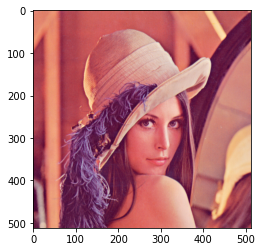

image shape: (1, 3, 512, 512)


In [73]:
img_url = 'https://upload.wikimedia.org/wikipedia/ko/2/24/Lenna.png?20170110121321'
image_color = url_to_image(img_url)
print('image shape:', image_color.shape)

plt.imshow(image_color)
plt.show()

image_color = np.expand_dims(image_color.transpose(2, 0, 1), axis=0)
print('image shape:', image_color.shape)

In [74]:
W3, b3 = init_weight(10, 3, 3)
conv3 = Conv2D(W3, b3)
output3 = conv3.forward(image_color)

print('Conv Layer size:', output3.shape)

Conv Layer size: (1, 10, 510, 510)


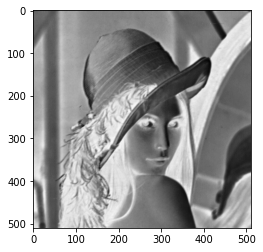

In [76]:
plt.imshow(output3[0, 3, :, :], cmap='gray')

### 동일한 이미지 여러 장 테스트 (배치 처리)

In [ ]:
img_url = 'https://upload.wikimedia.org/wikipedia/ko/2/24/Lenna.png?20170110121321'
image_gray = url_to_image(img_url, gray=True)
image_gray = image_gray.reshape(image_gray.shape[0], -1, 1)
print('image shape:', image_gray.shape)

image_gray = np.expand_dims(image_gray.transpose(2, 0, 1), axis=0)

plt.imshow(image_gray[0, 0, :, :], cmap='gray')
plt.show()

### 동일한 이미지 배치처리(color)

## 풀링 층(Pooling Layer)

### 풀링 레이어 테스트
- 2차원 이미지
  - (Height, Width, 1)

### 동일한 이미지 배치처리
- Color Image

- conv --> maxpooling --> conv --> maxpooling

- 시각화 과정
  - 5번째 이미지
  - [2, 5, 9] 필터를 통해 확인

# 대표적인 CNN 모델 소개

## LeNet - 5

<img src="https://miro.medium.com/max/4308/1*1TI1aGBZ4dybR6__DI9dzA.png">
  
  <center>[LeNet-5 구조]</center>

  <sub>출처: https://medium.com/@pechyonkin/key-deep-learning-architectures-lenet-5-6fc3c59e6f4</sub>

## AlexNet

- 활성화 함수로 **ReLU** 사용

- 국소적 정규화(Local Response normalization, LRN) 실시하는 계층 사용

- 드롭아웃

  <img src="https://miro.medium.com/proxy/1*qyc21qM0oxWEuRaj-XJKcw.png" width="800">

  <center>[AlexNet 구조]</center>

  <sub>출처: http://www.cs.toronto.edu/~hinton/absps/imagenet.pdf</sub>

## VGG - 16

- 모든 컨볼루션 레이어에서의 필터(커널) 사이즈를 **3x3**으로 설정

- 2x2 MaxPooling

- 필터의 개수는 Conv Block을 지나가면서 2배씩 증가  
  32 -> 64 -> 128

  <br>

  <img src="https://www.researchgate.net/profile/Jose_Cano31/publication/327070011/figure/fig1/AS:660549306159105@1534498635256/VGG-16-neural-network-architecture.png" width="800">

  <center>[VGG-16 구조]</center>

  <sub>출처: Very Deep Convolutional Networks for Large-Scale Image Recognition</sub>

# CNN 학습 구현 - MNIST

## modules import

## Util Functions

## Util Classes

## 데이터 로드

## Bulid Model

## Hyper Parameters

## 모델 생성 및 학습

### 생각보다 학습이 잘 되지 않았던 이유
- 학습 데이터의 수 부족
  - 학습 시간고려

- FC Layer의 노드수가 적절했는지

- 학습률(learning rate)값이 적절했는지

- ...

## 어떠한 조건에서 가장 좋은 결과를 내는지는 값을 **적절히** 바꾸어 시도해보아야함